In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline
import config 
import sql_con
import csv

In [28]:
# get module variables
ROOT_DIR = config.ROOT_DIR
select_records = sql_con.select_records
insert_records = sql_con.insert_records
update_records = sql_con.update_records
conn_odbc = sql_con.conn_odbc
read_contents = sql_con.read_contents

#### Read from car_prices dataset and correct/transform malformed pattern before reading to final dataframe
#### Run the info and describe dataframe methods to get a quick understanding of the data

In [29]:
raw_df = pd.read_csv(rf"{ROOT_DIR}/data/car_prices.csv", delimiter="\t")

In [30]:
raw_df

,"year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate"
0,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
1,"2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg5..."
2,"2014,BMW,3 Series,328i SULEV,Sedan,automatic,w..."
3,"2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f13..."
4,"2014,BMW,6 Series Gran Coupe,650i,Sedan,automa..."
...,...
558832,"2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,..."
558833,"2012,Ram,2500,Power Wagon,Crew Cab,automatic,3..."
558834,"2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58c..."
558835,"2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al..."


In [31]:
to_replace = "SE PZEV w/Connectivity, Navitgation" # csv malformation
value = "SE"
raw_df.replace(to_replace=to_replace, value=value, regex=True, inplace=True)

In [32]:
raw_df.to_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", quoting=csv.QUOTE_NONE, sep="\t", index=False)

In [33]:
df = pd.read_csv(rf"{ROOT_DIR}/data/car_sales_cleaned.csv", delimiter=",")

In [34]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493480 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  int64  
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [36]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547043.000000,558743.000000,558837.000000,558837.000000
mean,2010.038927,3.424511,68320.437548,13769.319811,13611.207538
std,3.966864,0.949462,53398.058707,9679.649690,9749.444610
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28371.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52254.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99109.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


## Numeric Variable Relationships
#### Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset

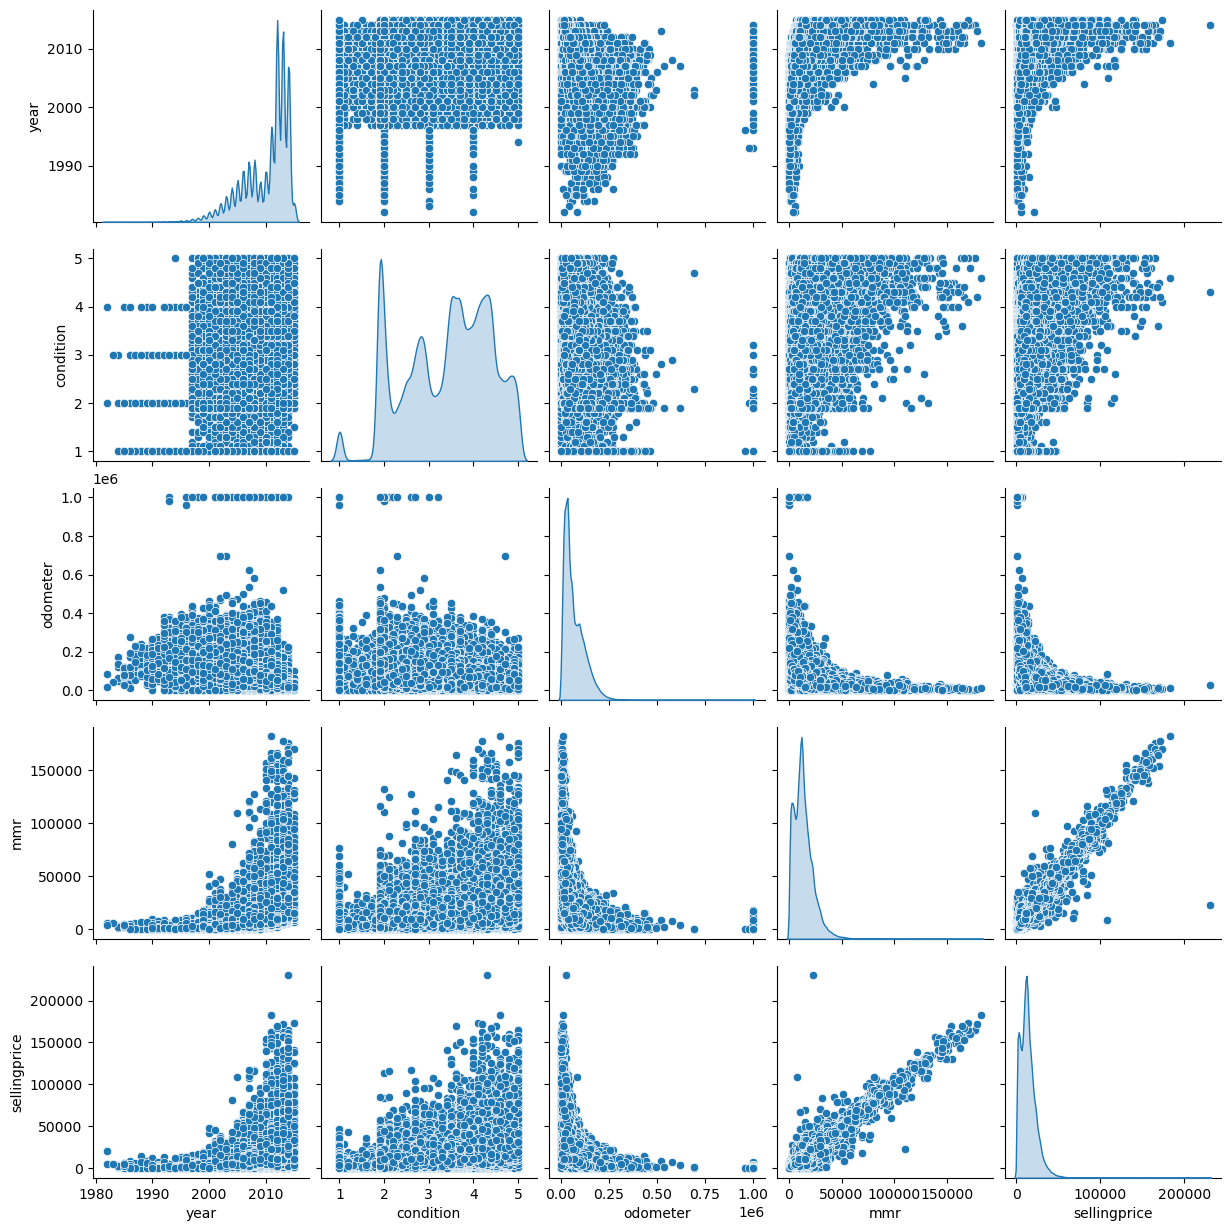

In [37]:
sns.pairplot(df, diag_kind="kde")

#### Use pairplot on filtered data for body in ["SUV", "Sedan", "Convertible", "Coupe"] and use hue parameter to map different colors to body types
#### Use corner = True argument to make this pairplot a corner plot/axes won't be added to upper triangle of the grid

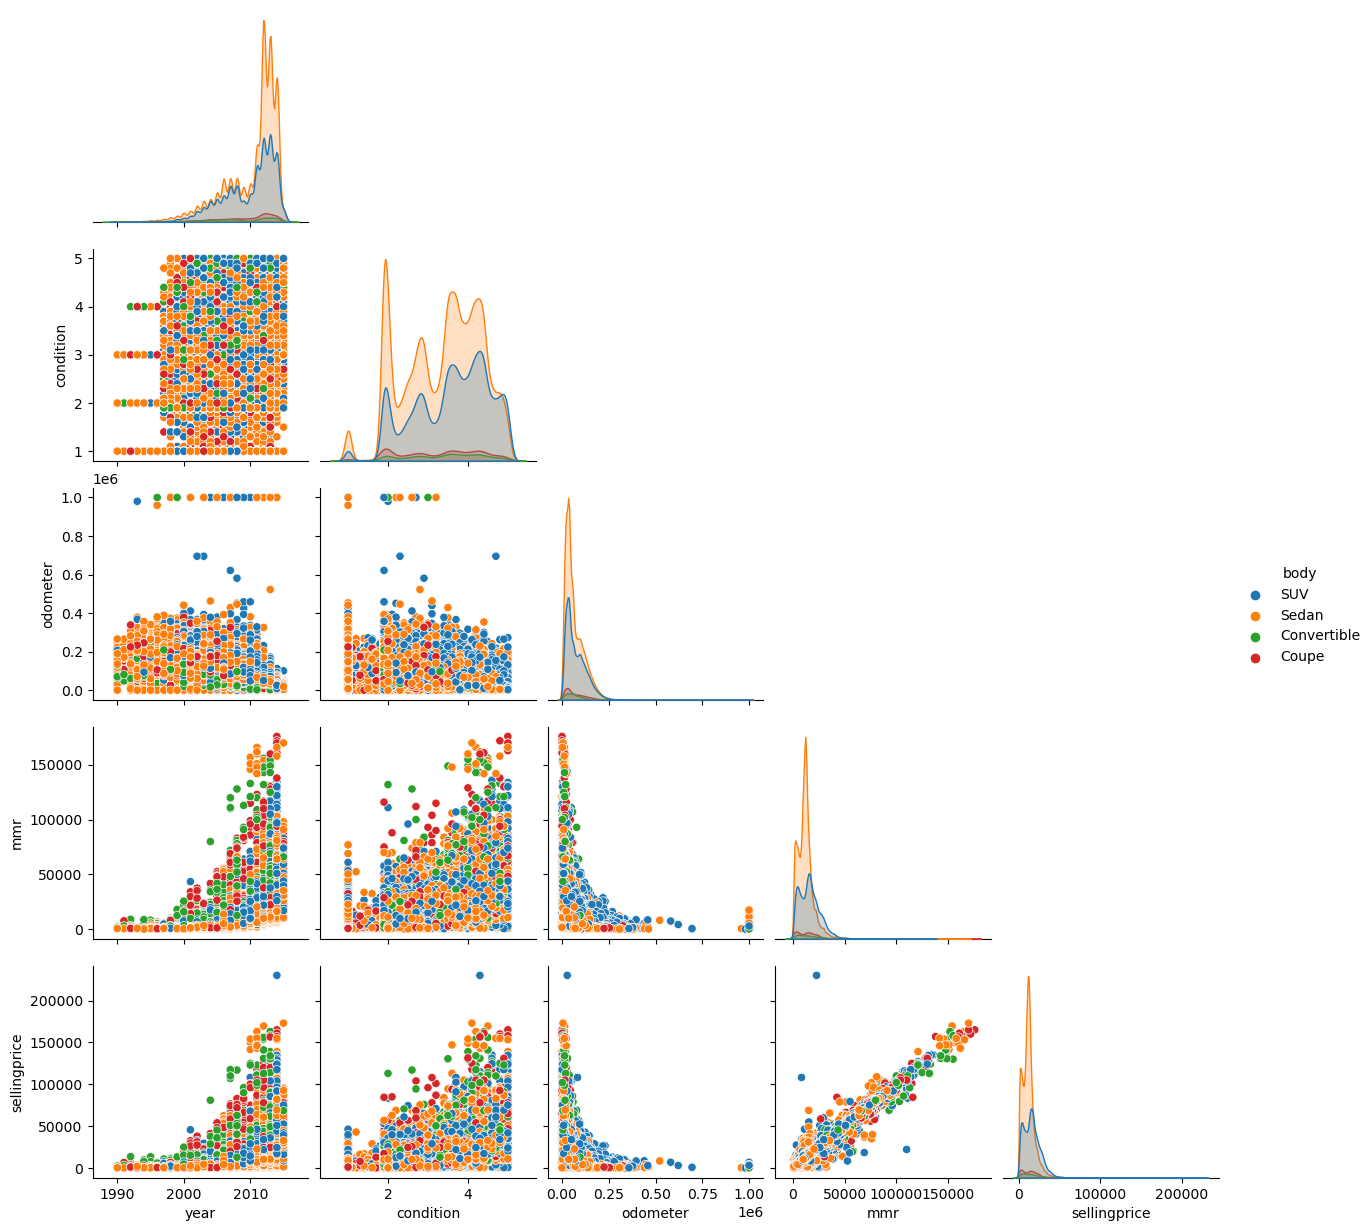

In [38]:
sns.pairplot(
    df[df["body"].isin(["SUV", "Sedan", "Convertible", "Coupe"])],
    corner=True,
    hue='body'
)